In [62]:
# https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

from sklearn.externals import joblib

# finalMergedDF = joblib.load('finalMergedDF_noOutputs5.pkl') 
finalMergedDF = joblib.load('noOutputsMoodDF.pkl') 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler

from pandas import DataFrame
from pandas import concat

from keras.models import Sequential
from keras.layers import LSTM 
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

del finalMergedDF['time']
# del finalMergedDF['index']

cols = list(finalMergedDF)
cols.insert(0, cols.pop(cols.index('mood')))
finalMergedDF = finalMergedDF.loc[:,cols]

values = finalMergedDF.values
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)

reframed = series_to_supervised(scaled, 1,1)
reframed.drop(reframed.columns[[30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57]], axis=1, inplace=True)
reframed

# scaler_later = scaler.fit(values)
# joblib.dump(scaler_later, 'scaler_mood.pkl') 

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),...,var21(t-1),var22(t-1),var23(t-1),var24(t-1),var25(t-1),var26(t-1),var27(t-1),var28(t-1),var29(t-1),var1(t)
1,0.625,0.980413,0.002839,0.432082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.166667,0.063758,0.071429,0.00,0.8525,0.255256,1.0,0.0,1.000000,0.500
2,0.500,0.981005,0.115956,0.470857,0.205298,0.222222,0.633427,0.000000,0.707471,0.000000,...,0.166667,0.000000,0.000000,0.00,0.3340,0.389911,0.0,0.1,0.826087,0.500
3,0.500,0.863739,0.224289,0.290708,0.039735,0.111111,0.000000,0.000000,0.000000,0.000000,...,0.166667,0.013423,0.000000,0.00,0.3340,0.389911,0.0,0.1,0.826087,0.500
4,0.500,0.991263,0.009071,0.432082,0.205298,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.166667,0.000000,0.000000,0.00,0.3425,0.345026,0.0,0.0,0.869565,0.500
5,0.500,0.961535,0.001885,0.432722,0.152318,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.166667,0.053691,0.071429,0.00,0.3350,0.345026,1.0,0.0,0.913043,0.375
6,0.375,0.985285,0.011245,0.434190,0.006623,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.166667,0.000000,0.000000,0.00,0.2286,0.315103,1.0,0.0,0.956522,0.625
7,0.625,0.980206,0.165060,0.380771,0.033113,0.222222,0.000000,0.857240,0.683281,0.000000,...,0.166667,0.033557,0.035714,0.00,0.8926,0.285179,1.0,0.0,0.695652,0.625
8,0.625,0.994932,0.049078,0.422754,0.185430,0.000000,0.000000,0.731494,0.663139,0.000000,...,0.166667,0.046980,0.017857,0.00,0.6928,0.285179,0.0,0.0,0.739130,0.375
9,0.375,0.985339,0.003395,0.431941,0.039735,0.000000,0.000000,0.000000,0.703833,0.000000,...,0.166667,0.006711,0.017857,0.00,0.5155,0.285179,1.0,0.1,0.956522,0.375
10,0.375,0.793166,0.450490,0.662190,0.000000,0.111111,0.000000,0.000000,0.703833,0.000000,...,0.166667,0.006711,0.017857,0.00,0.1378,0.285179,1.0,0.1,0.956522,0.500


In [53]:
values = reframed.values
n_train_hours = 850
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)



(850, 1, 29) (850,) (145, 1, 29) (145,)


Train on 850 samples, validate on 145 samples
Epoch 1/65
 - 2s - loss: 0.4313 - val_loss: 0.2517
Epoch 2/65
 - 0s - loss: 0.1907 - val_loss: 0.0914
Epoch 3/65
 - 0s - loss: 0.1348 - val_loss: 0.1444
Epoch 4/65
 - 0s - loss: 0.1568 - val_loss: 0.1050
Epoch 5/65
 - 0s - loss: 0.1127 - val_loss: 0.0910
Epoch 6/65
 - 0s - loss: 0.1149 - val_loss: 0.0999
Epoch 7/65
 - 0s - loss: 0.1147 - val_loss: 0.0867
Epoch 8/65
 - 0s - loss: 0.1049 - val_loss: 0.0877
Epoch 9/65
 - 0s - loss: 0.1052 - val_loss: 0.0852
Epoch 10/65
 - 0s - loss: 0.1019 - val_loss: 0.0834
Epoch 11/65
 - 0s - loss: 0.1023 - val_loss: 0.0825
Epoch 12/65
 - 0s - loss: 0.1009 - val_loss: 0.0822
Epoch 13/65
 - 0s - loss: 0.1002 - val_loss: 0.0817
Epoch 14/65
 - 0s - loss: 0.0995 - val_loss: 0.0806
Epoch 15/65
 - 0s - loss: 0.0994 - val_loss: 0.0800
Epoch 16/65
 - 0s - loss: 0.0989 - val_loss: 0.0797
Epoch 17/65
 - 0s - loss: 0.0985 - val_loss: 0.0789
Epoch 18/65
 - 0s - loss: 0.0981 - val_loss: 0.0784
Epoch 19/65
 - 0s - loss: 0

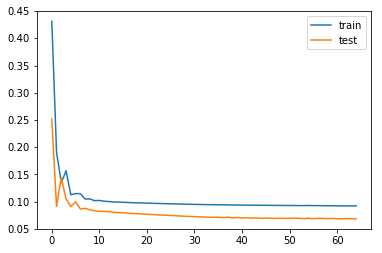

In [57]:
import matplotlib.pyplot as plt 
model = Sequential()
model.add(LSTM(250, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

history = model.fit(train_X, train_y, epochs=65, batch_size=200, validation_data=(test_X, test_y), verbose=2, shuffle=False)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [0]:
# #from sklearn.externals import joblib

# #joblib.dump(model, '/Users/jxu2/github/thesis_explorations/life_support/predictor/LSTM_mood_predictor.pkl') 
# model.save('my_model.h5')  


In [0]:
# from google.colab import files
# files.download('my_model.h5')

In [58]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# make a prediction
yhat = DataFrame(model.predict(test_X))
test_X = DataFrame(test_X.reshape((test_X.shape[0], test_X.shape[2])))
# invert scaling for forecast
inv_yhat = concat((yhat, test_X.iloc[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = DataFrame(test_y.reshape((len(test_y), 1)))
inv_y = concat((test_y, test_X.iloc[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
print('r-squared: %f'%(r2_score(inv_y, inv_yhat)))

Test RMSE: 0.393
r-squared: 0.100793


In [37]:
# print(inv_yhat)

In [59]:
model.save('LSTM_mood_predictor_no_reporter.h5')  


In [0]:
from google.colab import files
files.download('LSTM_mood_predictor_no_reporter.h5')

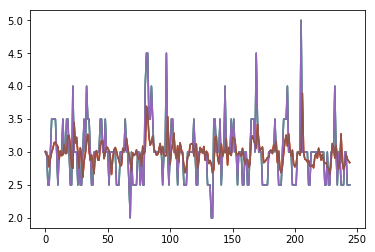

In [41]:
plt.plot(inv_y)
plt.plot(inv_yhat)
plt.show()